# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from selenium.webdriver.chrome.service import Service
chrome_path = "\\Users\\aspen\\Downloads\\chromedriver_win32\\chromedriver"
my_service = Service(executable_path=chrome_path)
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = html_soup.find('table', class_='table')
print(table)


<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [7]:
#option 2
df = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")

In [8]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# # Create an empty list
# mars_weather = {}
# rows = table.find_all('tr')

# # Loop through the rows
# for row in rows:
#     row_heading = row.find('th')
#     row_data = row.find('td')
#     mars_weather[row_heading] = row_data
# mars_weather


In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
# convert ls data to radians
mars_df['ls_rad'] = mars_df['ls'] * np.pi / 180
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
 7   ls_rad            1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 116.8 KB


In [11]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
0,2,2012-08-16,10,155,6,-75.0,739.0,2.705260
1,13,2012-08-17,11,156,6,-76.0,740.0,2.722714
2,24,2012-08-18,12,156,6,-76.0,741.0,2.722714
3,35,2012-08-19,13,157,6,-74.0,732.0,2.740167
4,46,2012-08-20,14,157,6,-74.0,740.0,2.740167
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2.321288
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2.338741
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2.338741
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2.356194


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_months = np.unique(mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
# 2. How many Martian days worth of data exist in the scraped data set?
martian_days = mars_df['terrestrial_date'].count()
martian_days

1867

In [18]:
# get table headers
headers = list(mars_df)
# coldest and warmest months on Mars
mintemp_df = mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure,ls_rad
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
1,2,1175.853933,44.258427,-79.932584,889.455056,0.772455
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [19]:
# 3. What is the average low temperature by month?
mars_df[['month', 'min_temp']]

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0
...,...,...
1862,5,-78.0
1863,5,-77.0
1864,5,-76.0
1865,5,-77.0


In [20]:
# Plot the average temperature by month
# plot the average minimum daily temperature of all the months
def barplot(x, y, title):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)
    if 'min temperature' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        ax.set_yticks(np.arange(0, -91, -10))
        figname = './Data/mars_mintemp.png'
    elif 'pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
        figname = './Data/mars_pressure.png'
    elif 'longitude' in title.lower():
        ax.set_ylabel('Solar Longitude (rad)')
        figname = './Data/mars_solarlongitude.png'
    else:
        ax.set_ylabel(f'{title.split()[1]} {title.split()[2]} (sols)')
    #     figname = './Data/mars_elapsedsol.png'
    # # Save the figure.
    # fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

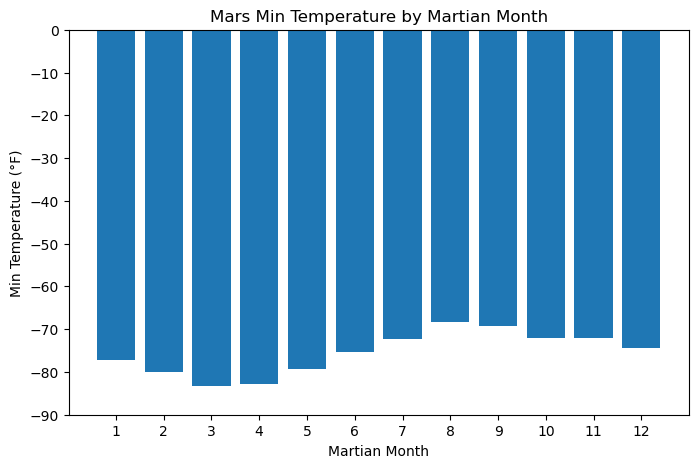

In [21]:
barplot(mintemp_df['month'], mintemp_df['min_temp'], 'Mars Min Temperature by Martian Month')

In [22]:
# 4. pressure by Martian month
# months on Mars with lowest and highest atmospheric pressure
pressure_df = mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure_df

,month,sol,ls,min_temp,pressure,ls_rad
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
7,8,795.333333,224.347518,-68.382979,873.829787,3.915603
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [23]:
mars_df.loc[(mars_df['pressure'] == mars_df['pressure'].min()) | (mars_df['pressure'] == mars_df['pressure'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
156,2013-01-27,170,252,9,-66.0,925.0,4.398230
157,2013-01-28,171,253,9,-67.0,925.0,4.415683
766,2014-12-23,846,257,9,-74.0,925.0,4.485496
1866,2018-02-27,1977,135,5,-77.0,727.0,2.356194


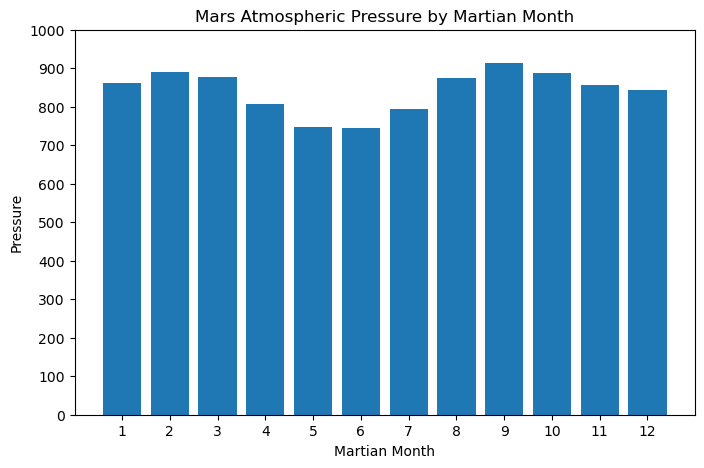

In [24]:
# Plot the pressure by month
barplot(pressure_df['month'], pressure_df['pressure'], 'Mars Atmospheric Pressure by Martian Month')

In [25]:
# 687 earth days elapse during one year on Mars
# plot the average minimum daily temperature of all the months
def plot2D(x, y, title):
    plt.rc('lines', linewidth=2, color='r')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(title.split()[-1], fontsize=14)
    ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)', fontsize=14)
    ax.set_xticks(np.arange(0, 2001, 200))
    # ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -96, -5))
    ax.grid(which='both')
    ax.plot(x, y, '*')
    # Save the figure.
    # figname = './Data/mars_mintemp_daily.png'
    # fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

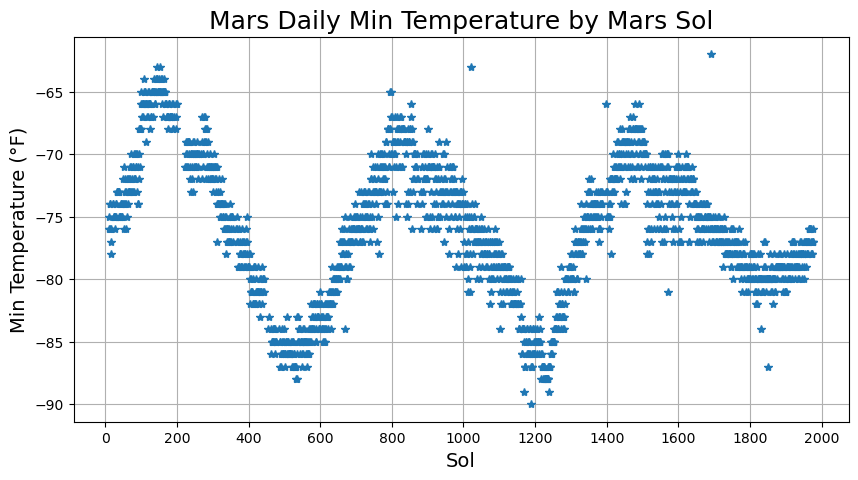

In [26]:
plot2D(mars_df['sol'], mars_df['min_temp'], 'Mars Daily Min Temperature by Mars Sol')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
file_name = 'mars_data_collection.csv'
mars_df.to_csv(file_name, index=False)

In [28]:
browser.quit()